In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurment = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurment.date).order_by(Measurment.date.desc()).first()
print (f"{recent_date}")

('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = "2017-08-23"


# Calculate the date one year from the last date in data set.


converted_recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d').date()
print(converted_recent_date)
calculated_date= str(converted_recent_date - dt.timedelta(days = 366))
print (calculated_date)
print (type(calculated_date))

2017-08-23
2016-08-22
<class 'str'>


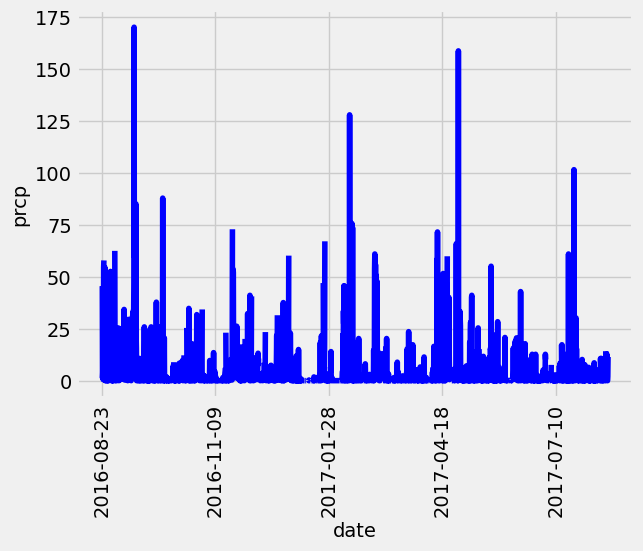

In [11]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurment.date,Measurment.prcp).\
                    filter(Measurment.date> "2016-08-22")
# Save the query results as a Pandas DataFrame. Explicitly set the column names

prcp_results = []
for data in prcp_data:
    prcp_results.append(data)
prcp_results


df_prcp = pd.DataFrame(prcp_results, columns=["date", "prcp"])
df_prcp.set_index("date", inplace = True)
df_prcp

# Sort the dataframe by date
df_prcp_sort = df_prcp.sort_values("date")
df_prcp_sort
# # # Use Pandas Plotting with Matplotlib to plot the data
df_prcp_sort["prcp"].plot( color = "blue")
plt.xticks(rotation = "vertical")
plt.xlabel("date")
plt.ylabel("prcp")
plt.grid(True)
plt.tight_layout
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_prcp_sort.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.name).count()
print(total_stations)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
number_of_rows_stations = session.query(Measurment.station,func.count(Measurment.station).label("count")
                                       ).group_by(Measurment.station).order_by ("count")
for station in number_of_rows_stations:
    print(f"{station}")

('USC00518838', 511)
('USC00517948', 1372)
('USC00511918', 1979)
('USC00514830', 2202)
('USC00516128', 2612)
('USC00519523', 2669)
('USC00513117', 2709)
('USC00519397', 2724)
('USC00519281', 2772)


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calc_tobs = session.query(func.min(Measurment.tobs),func.max(Measurment.tobs),
                                                               func.avg(Measurment.tobs)).filter(Measurment.station =="USC00519281")

analysis_data = []
for row in calc_tobs:
    (min_temp,max_temp,avg_temp) = (row)
    analysis_data.append(min_temp)
    analysis_data.append(max_temp)
    analysis_data.append(avg_temp)
print(analysis_data)

[12.2, 29.4, 22.03582251082252]


<Axes: xlabel='Temperature', ylabel='Frequency'>

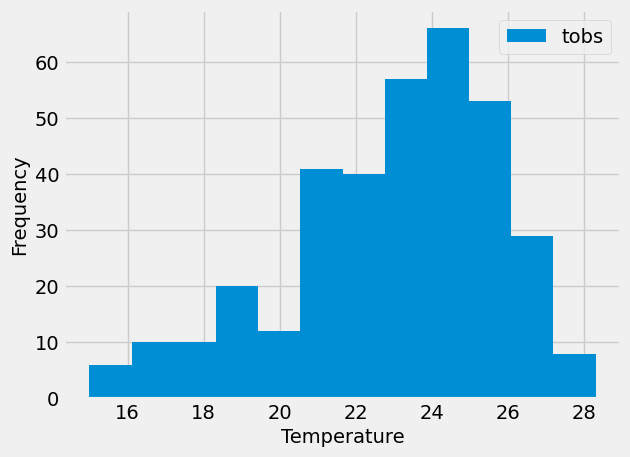

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurment.tobs).filter(Measurment.station=="USC00519281"
                                                 ).filter(Measurment.date> "2016-08-22")
tobs_results = []
for data in tobs_data:
    tobs_results.append(data)

df2 = pd.DataFrame(tobs_results, columns=['tobs'])
plot2 = df2.plot(kind = "hist",bins = 12)
plt.xlabel("Temperature")
plt.grid
plot2

# Close Session

In [17]:
# Close Session
session.close()